In [1]:
# ruff: noqa: E402

# Cell Formatting

## Formatting with Pandas

`itables` builds the HTML representation of your Pandas dataframes using Pandas itself, so
you can use [Pandas' formatting options](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).
For instance, you can change the precision used to display floating numbers:


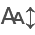

In [2]:
import itables

itables.init_notebook_mode()

In [3]:
import math

import pandas as pd

with pd.option_context("display.float_format", "{:,.2f}".format):
    itables.show(pd.Series([i * math.pi for i in range(1, 6)]))

Or you can use a custom formatter:

In [4]:
with pd.option_context("display.float_format", "${:,.2f}".format):
    itables.show(pd.Series([i * math.pi for i in range(1, 6)]))

## Formatting with Javascript

Numbers are formatted using Pandas, then are converted back to float to ensure they come in the right order when sorted.
Therefore, to achieve a particular formatting you might have to resort to the
[`columns.render` option](https://datatables.net/examples/advanced_init/column_render.html)
of DataTables.

For instance, this [example](https://datatables.net/forums/discussion/61407/how-to-apply-a-numeric-format-to-a-column)
can be ported like this:

In [5]:
itables.show(
    pd.Series([i * math.pi * 1e4 for i in range(1, 6)]),
    columnDefs=[
        {
            "targets": "_all",
            "render": itables.JavascriptCode(
                "$.fn.dataTable.render.number(',', '.', 3, '$')"
            ),
        }
    ],
)

## Colors based on cell values

You can use Javascript callbacks to set the cell or row style depending on the cell content.

The example below, in which we color in red the cells with negative numbers, is directly inspired by the corresponding DataTables [example](https://datatables.net/reference/option/columns.createdCell).

Note how the Javascript callback is declared as `JavascriptFunction` object below.

In [6]:
itables.show(
    pd.DataFrame([[-1, 2, -3, 4, -5], [6, -7, 8, -9, 10]], columns=list("abcde")),
    columnDefs=[
        {
            "targets": "_all",
            "createdCell": itables.JavascriptFunction(
                """
function (td, cellData, rowData, row, col) {
    if (cellData < 0) {
        $(td).css('color', 'red')
    }
}
"""
            ),
        }
    ],
)

## Formatting with Pandas style

ITables in version 1.6 and above can render
[Pandas Style](https://pandas.pydata.org/docs/user_guide/style.html)
objects as interactive DataTables.

This way, you can easily add background color, and even
tooltips to your dataframes, and still get them
displayed using DataTables - see our [examples](pandas_style.md).

```{warning}
Please note that Pandas Style objects are rendered using
their `.to_html()` method, which is less efficient that
the default JS data export used by ITables.
```